### Tujuan Proyek
Proyek ini bertujuan untuk menganalisis data penjualan dari toko retail Superstore menggunakan Python. Fokus utamanya adalah:
- Menemukan tren penjualan dan profit
- Mengidentifikasi wilayah dan kategori produk yang paling menguntungkan
- Memberikan insight bisnis berdasarkan data historis

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting grafik agar tampil di notebook
%matplotlib inline
sns.set(style="whitegrid")

# Baca dataset
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")

# Lihat 5 baris pertama
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
print("Jumlah missing values:\n", df.isnull().sum())
print("\nJumlah data duplikat:", df.duplicated().sum())

Jumlah missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Jumlah data duplikat: 0


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.drop(columns="Postal Code", inplace=True)

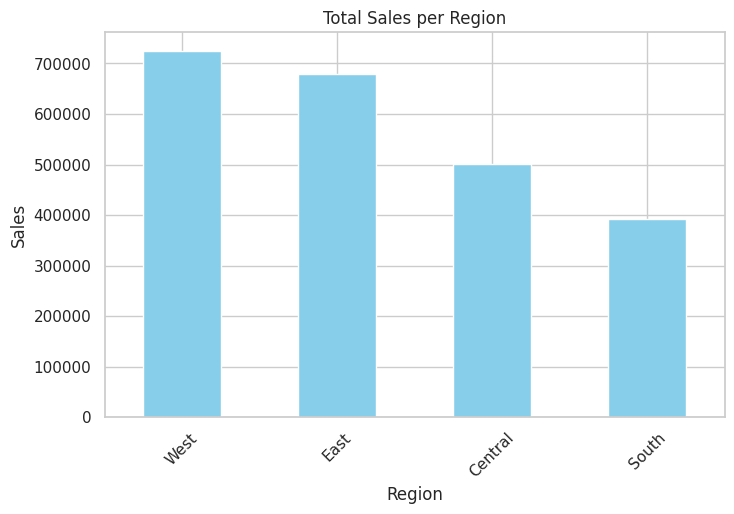

In [ ]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales per Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

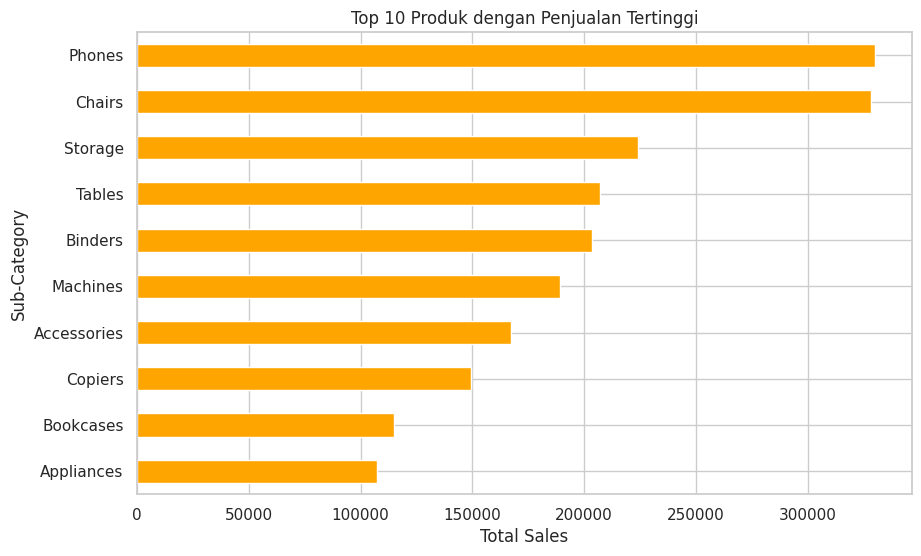

In [ ]:
top_products = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='orange')
plt.title("Top 10 Produk dengan Penjualan Tertinggi")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.gca().invert_yaxis()
plt.show()

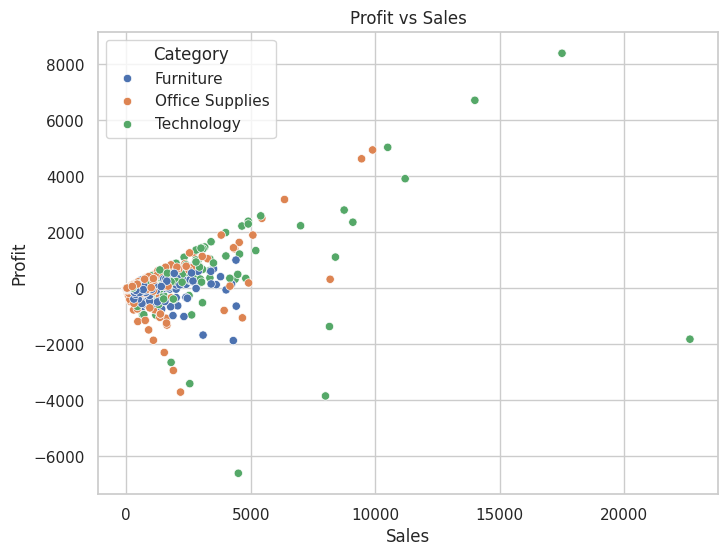

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category")
plt.title("Profit vs Sales")
plt.show()

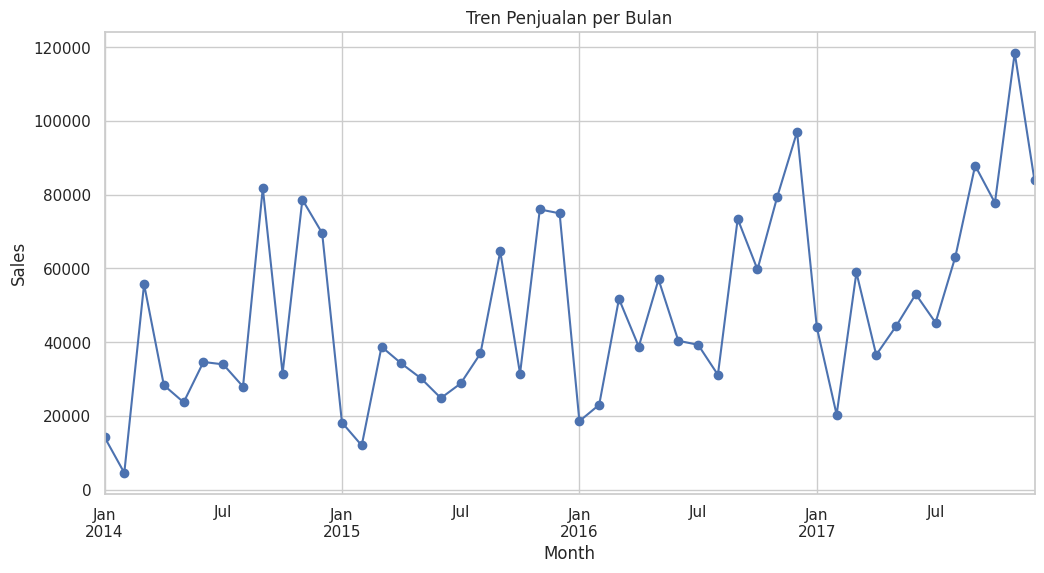

In [ ]:
# Ubah ke datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Tambahkan kolom bulan
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Tren Penjualan per Bulan")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

## Insight dari Analisis

1. **Wilayah Tengah (Central)** menghasilkan **profit paling tinggi**, meskipun penjualannya tidak sebesar Wilayah Barat.
2. **Kategori Office Supplies** adalah kategori dengan **jumlah transaksi tertinggi**, tetapi **profitnya paling rendah** dibandingkan Furniture dan Technology.
3. **Sub-kategori Copiers** mencatatkan **profit per transaksi tertinggi**, menjadikannya produk premium.
4. **Produk Furniture** memiliki **profit margin terendah**, bahkan sering mengalami kerugian pada sub-kategori tertentu seperti Bookcases dan Tables.
5. Terdapat **korelasi positif** antara `Sales` dan `Profit`, namun tidak terlalu kuat, menandakan bahwa penjualan tinggi belum tentu profit tinggi (karena diskon, biaya logistik, dll).
6. Penjualan mengalami peningkatan yang signifikan di bulan November dan Desember, menunjukkan peluang kampanye akhir tahun (Q4).

---

## Kesimpulan & Saran

- **Fokuskan promosi** pada wilayah Central dan produk Copiers yang terbukti sangat menguntungkan.
- Perlu **evaluasi strategi harga dan efisiensi operasional** untuk kategori Furniture, terutama Bookcases dan Tables.
- Tingkatkan **penjualan kuartal akhir (Q4)** dengan promo akhir tahun, karena periode tersebut menunjukkan lonjakan transaksi.
- Data penjualan perlu dipantau dengan segmentasi lebih rinci (misal: customer segment, shipping mode) untuk strategi yang lebih presisi.

---

_Analisis dilakukan menggunakan Python (pandas, matplotlib, seaborn) dengan dataset publik Sample Superstore._